# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from scipy import stats
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
##Load the dataset
try:
    df = pd.read_csv('marketing.csv')
except FileNotFoundError:
    print(f"Error: The file with associated path is not found")
except Exception as e:
    print(f"An error occured: {e}")
    
# Displaying sample of 5 rows of the loaded dataset
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
print(df.shape)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

(2240, 27)
Number of rows: 2240
Number of columns: 27


In [4]:
## checking general information about the dataframe using the .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Inferences:

- The dataset is having 2240 rows and 27 columns.
- There is 1 float type data and 3 object type and 23 integer data present.
- As per the overview it is clear that we have to deal with object type data.

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
## lets check missing values in the dataset
print("Percentage of missing values in each column:")
df.isnull().sum()/len(df)*100

Percentage of missing values in each column:


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

- **Observations:** There is 1.07(income) missing values present which is less but can cause issue.


In [6]:
# static value fill, forward fill, backward fill and statistical methods to fill the missing values
# here, we will use statistical methods to fill the missing values

df['Income'] = df['Income'].fillna(df['Income'].mean())

In [7]:
# Re-Checking percentage of missing data after replacing the value
df.isnull().sum()/len(df)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
## Check duplicated records in the dataset
(df[df.duplicated()])
#df.duplicated().sum()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


- There is no duplicate values

### 5. Drop the columns which you think redundant for the analysis 

In [9]:
## Checking descriptive analysis of dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
## dropping redundant columns
df = df.drop(columns=['ID','Dt_Customer'], axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
# unique categories in the column 'Marital_Status'
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
# Checking number of unique categories present in the "Marital_Status"
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
# i) Group categories 'Married', 'Together' as 'relationship'
# ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced','Widow','Alone', 'YOLO','Absurd'],'Single')

- In the above cell we are grouping 'Married', 'Together' as "relationship"
- Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

In [14]:
## recheck after grouping the categories.
df['Marital_Status'].value_counts()

Marital_Status
relationship    1444
Single           796
Name: count, dtype: int64

In [15]:
# Another approach:
# # Define the mapping for the new groups
# mapping = {'Married': 'relationship', 'Together': 'relationship', 
#            'Divorced': 'Single', 'Widow': 'Single', 
#            'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'}
# # Apply the mapping to the 'Marital_Status' column
# df['Marital_Status'] = df['Marital_Status'].replace(mapping)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [16]:
# List of columns to be grouped
expense_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a new column 'Total_Expenses' with the sum of specified columns
df['Total_Expenses'] = df[expense_columns].sum(axis=1)

# Print the first few rows to verify the changes
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'Total_Expenses']].head(2)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenses
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [17]:
# List of columns to be grouped
expense_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

# Create a new column 'Total_Expenses' with the sum of specified columns
df['Num_Total_Purchases'] = df[expense_columns].sum(axis=1)

# Print the first few rows to verify the changes
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'Num_Total_Purchases']].head(2)

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,Num_Total_Purchases
0,8,10,4,3,25
1,1,1,2,2,6


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [18]:
# List of columns to be grouped
expense_columns = ['Kidhome', 'Teenhome']

# Create a new column 'Total_Expenses' with the sum of specified columns
df['Kids'] = df[expense_columns].sum(axis=1)

# Print the first few rows to verify the changes
df[[ 'Kidhome', 'Teenhome', 'Kids']].head(2)

,Kidhome,Teenhome,Kids
0,0,0,0
1,1,1,2


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [19]:
# List of columns to be grouped
expense_columns = ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

# Create a new column 'Total_Expenses' with the sum of specified columns
df['TotalAcceptedCmp'] = df[expense_columns].sum(axis=1)

# Print the first few rows to verify the changes
df[['AcceptedCmp1' , 'AcceptedCmp2' , 'AcceptedCmp3' , 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'TotalAcceptedCmp']].head(2)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,TotalAcceptedCmp
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0


### 11. Drop those columns which we have used above for obtaining new features

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

- We can see  new columns has been created named "Total Expenses","Kids","Num_Total_Purchases","TotalAcceptedCmp" after grouping used above.
- now there is no use of the columns which has been grouped so we will remove it.

In [21]:
# Dropping the columns, since we have grouped them
unused_col = ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Kidhome', 'Teenhome','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df = df.drop(columns=unused_col, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


In [22]:
df.shape

(2240, 11)

- The column number has been reduced from 27 to 9. all the unsued columns has been deleted successfully.

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [23]:
# Checking the column 'Year_Birth'
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [24]:
# Adding a column "Age" in the dataframe
df['Age'] = 2024 - df['Year_Birth']
df.drop('Year_Birth',axis=1,inplace=True)
df.head(2)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   int64  
 4   NumWebVisitsMonth    2240 non-null   int64  
 5   Complain             2240 non-null   int64  
 6   Total_Expenses       2240 non-null   int64  
 7   Num_Total_Purchases  2240 non-null   int64  
 8   Kids                 2240 non-null   int64  
 9   TotalAcceptedCmp     2240 non-null   int64  
 10  Age                  2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


- A new column 'Age' has been created from 'year_Birth' and 'year_birth' is been deleted.
- Keeping a copy of the cleaned dataset (we will use it to assign the cluster labels and will analyze the clusters formed)

In [26]:
#storing a copy of data
dfc = df.copy()

### 13. Encode the categorical variables in the dataset

In [27]:
# Viewing all categorical columns in the datafarme
categorical_col = df.select_dtypes(include='O')
categorical_col.head(3)

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,relationship


In [28]:
# Initializing label encoder
le = LabelEncoder()

categorical_data = ['Education', 'Marital_Status']
for i in categorical_data:
    df[i] = le.fit_transform(df[i])
    
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1617,25,0,1,67
1,2,0,46344.0,38,5,0,27,6,2,0,70
2,2,1,71613.0,26,4,0,776,21,0,0,59
3,2,1,26646.0,26,6,0,53,8,1,0,40
4,4,1,58293.0,94,5,0,422,19,1,0,43


In [29]:
## Re-verifying the datatypes of columns which we have encoded.
df.dtypes

Education                int32
Marital_Status           int32
Income                 float64
Recency                  int64
NumWebVisitsMonth        int64
Complain                 int64
Total_Expenses           int64
Num_Total_Purchases      int64
Kids                     int64
TotalAcceptedCmp         int64
Age                      int64
dtype: object

- 'Education','Marital_Status' are getting values in numbers after doing label encoder in it.

### 14. Standardize the columns, so that values are in a particular range

In [30]:
## Standardization
sc = StandardScaler()

# creating a copy of the dataframe
df1 = df.copy()

# standardizing the dataframe values
standardize_col = sc.fit_transform(df1.values)

# storing the standardized values as a dataframe
standardize_col_df = pd.DataFrame(standardize_col, index=df1.index, columns= df1.columns)

standardize_col_df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [31]:
## step1: Calculate the covariance matrix.
cov_matrix = np.cov(standardize_col_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00044663 -0.01375403  0.1200273  -0.01173369 -0.04029882 -0.05056252
   0.09209518  0.09405439  0.05321304  0.06327892  0.17146685]
 [-0.01375403  1.00044663  0.00463847 -0.00450972  0.00344176 -0.00520466
  -0.01775232  0.00671037  0.03917598 -0.06004206 -0.0042384 ]
 [ 0.1200273   0.00463847  1.00044663 -0.00394826 -0.55006966 -0.02723528
   0.66500337  0.5636214  -0.29084155  0.28717443  0.16101378]
 [-0.01173369 -0.00450972 -0.00394826  1.00044663 -0.02145427  0.01323699
   0.02044173  0.00574294  0.01806145 -0.08900203  0.01987996]
 [-0.04029882  0.00344176 -0.55006966 -0.02145427  1.00044663  0.01977734
  -0.50044131 -0.31242795  0.41860616 -0.12836726 -0.12119336]
 [-0.05056252 -0.00520466 -0.02723528  0.01323699  0.01977734  1.00044663
  -0.03707503 -0.02059185  0.03108014 -0.01761676  0.030141  ]
 [ 0.09209518 -0.01775232  0.66500337  0.02044173 -0.50044131 -0.03707503
   1.00044663  0.75423984 -0.49911047  0.4564099   0.11135611]
 [ 0.09405439  0.0067

In [32]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[-8.10878879e-02  1.28355184e-02  2.36293947e-02  5.51249544e-01
   9.44095922e-02  1.09410621e-01  6.91170717e-01 -2.13981881e-01
   3.53512225e-01  1.33215293e-01  4.14647769e-02]
 [ 1.66012105e-02  5.44320001e-04  2.67214391e-03  7.24616823e-02
   9.22507506e-03 -1.59630615e-01  9.75252262e-02 -2.48006969e-01
  -2.93241983e-01 -5.20771188e-01  7.35314297e-01]
 [-4.53880338e-01  1.10208189e-01 -7.33626969e-01  1.11676478e-01
  -4.01003018e-01  2.33850859e-01 -3.55906464e-02  8.23323221e-02
  -7.12476789e-02 -3.27656138e-02  3.84949439e-02]
 [ 4.86396555e-03  3.74604574e-02 -1.76527197e-02  1.12971535e-01
  -4.88116231e-02 -1.39195279e-01  2.76319114e-02 -4.78177475e-01
  -6.57510164e-01  5.43205810e-01 -8.32561223e-02]
 [ 3.78658345e-01 -9.89489261e-02 -5.23256954e-01  3.88425153e-02
   4.48112460e-01  8.25533630e-02 -2.94912266e-01 -4.57654180e-01
   2.47273799e-01 -5.72617366e-02 -5.52876154e-02]
 [ 2.90760818e-02 -6.06341959e-03 -2.99897258e-03  2.18322944e-02
  

In [33]:
##Step3: Calculating the Variance explained and the cummulative variance explained

total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [28.99063120103076, 11.4278674182031, 9.773866099738857, 9.24010477284496, 9.07042034668098, 8.020823626792343, 7.404693691240487, 6.368828985843826, 5.2228298163814255, 3.035300649436158, 1.4446333918070997]
Cummulative Variance Explained:  [ 28.9906312   40.41849862  50.19236472  59.43246949  68.50288984
  76.52371347  83.92840716  90.29723614  95.52006596  98.55536661
 100.        ]


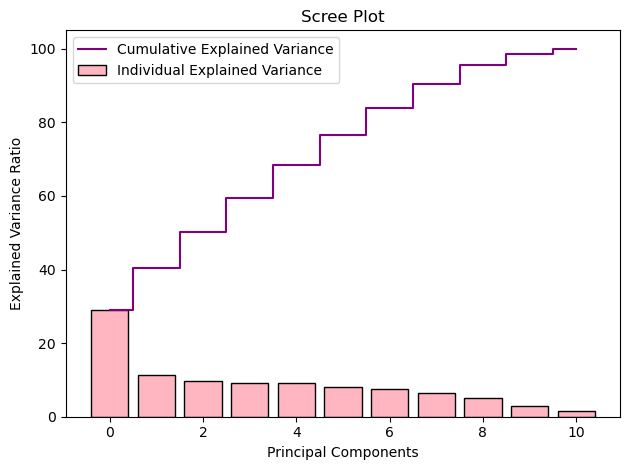

In [34]:
## step4: Scree plot.

plt.bar(range(11),var_exp, align='center', color='lightpink', edgecolor='black', label='Individual Explained Variance')
plt.step(range(11),cum_var_exp, where='mid', color='purple', label='Cumulative Explained Variance')
plt.legend(loc='best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.tight_layout()
plt.show()

- We can observe from the above scree plot the first 8 principal components are explaining the about 90-95% of the variation, So we can choose optimal number of principal components as 8.

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [35]:
## Fitting the PCA model Using the dimensions obtainted from the PCA to apply clustering.(i.e, 8)
pca = PCA(n_components=8)
pca.fit(standardize_col_df)

data_pca = pca.transform(standardize_col_df)
data_pca_df = pd.DataFrame(data_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316


#### Kmeans Clustering using PCA transformed data

In [36]:
# finding optimal k using Kmeans Clustering using PCA transformed data and elbow method
cluster_range = range(2,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)
    
## creataing a dataframe of number of clusters and cluster errors
clusters_df = pd.DataFrame({'num_clusters': cluster_range,
                           'clusters_errors': cluster_errors})
clusters_df

,num_clusters,clusters_errors
0,2,16858.827655
1,3,15441.611282
2,4,13346.337691
3,5,12282.105558
4,6,11219.191421
5,7,10574.262351
6,8,10029.890189
7,9,9608.377252
8,10,9216.858592
9,11,8915.657193


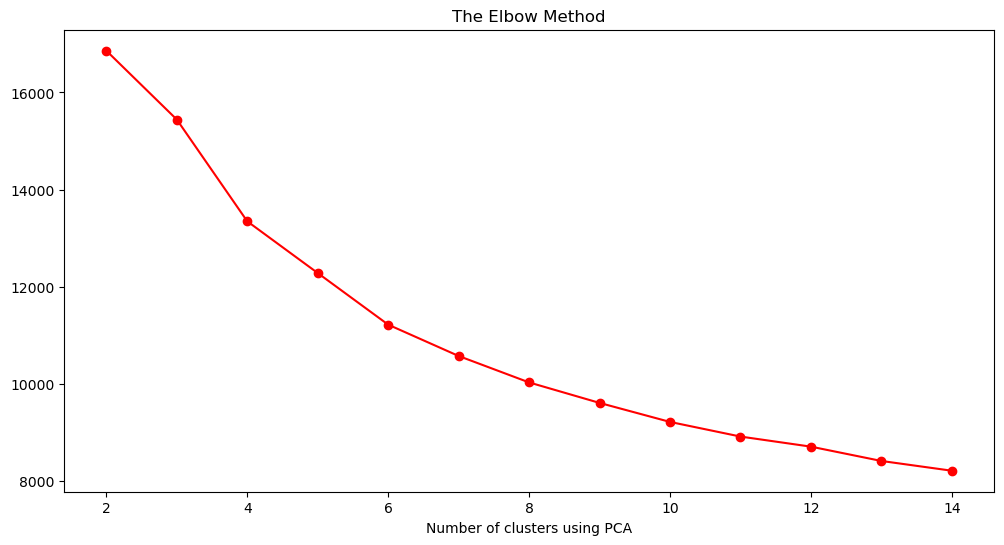

In [37]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['clusters_errors'],marker='o',color='r')

### Inferences: 

  - The Elbow Method involves plotting the number of clusters against the within-cluster sum of squares (clusters_errors) and looking for the "elbow" point where the rate of decrease in the error starts to slow down.
  - From the above elbow plot we can see at the cluster K=3, the inertia significantly decreases . Hence we can select our optimal clusters as K=3.
  - we can also observed that the second decrease starts from 6 onwards we can take 6 here but for more optimal results we will go for 3 clusters.

In [38]:
## Fit the KMeans clustering model using the obtained optimal K=3
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(data_pca_df)

## obtained labels from kmeans clustering
label = pd.DataFrame(kmeans.labels_,columns=['Label'])
kmeans_df = data_pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,0
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,1
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,0
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,1
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,2


In [39]:
kmeans_df['Label'].value_counts()

Label
1    1023
2     704
0     513
Name: count, dtype: int64

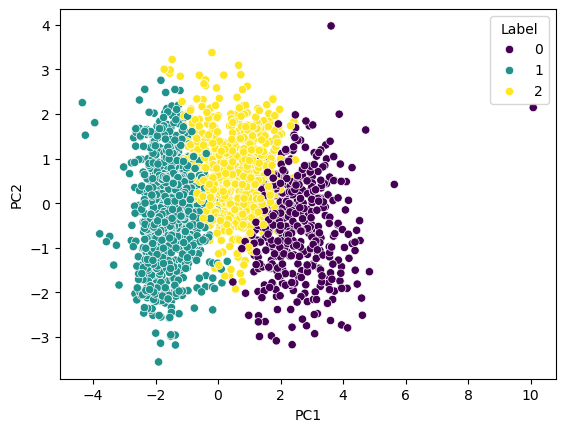

In [40]:
## Visualizing the clusters formed
sns.scatterplot(data=kmeans_df, x='PC1', y='PC2', hue='Label', palette='viridis')
plt.show()

- Three clusters has been found with the label 0,1,2 respectively.

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

#### Agglomerative clustering using the original data

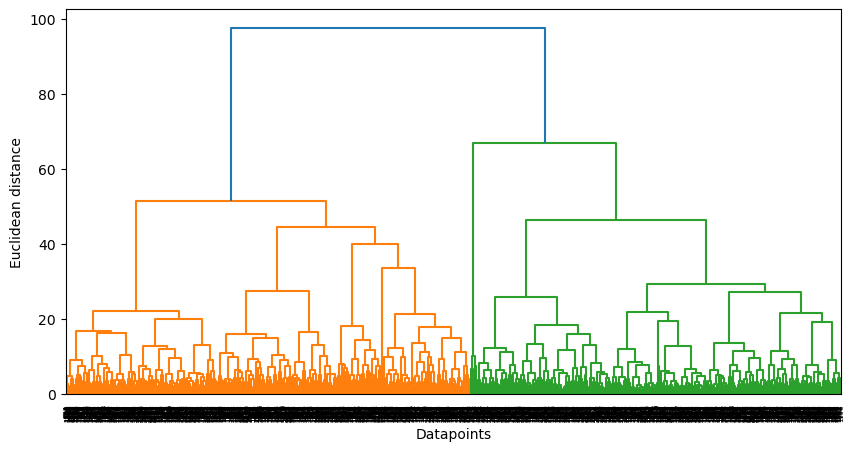

In [41]:
plt.figure(figsize=[10,5])
merge = linkage(standardize_col,method='ward')
dendrogram(merge, leaf_rotation=90)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

#### Computing silhoutte score for agglomerative clustering

In [42]:
from sklearn.metrics import silhouette_score

for i in range(2,25):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(standardize_col_df)
    labels = hier.fit_predict(standardize_col_df)
    print(i, silhouette_score(standardize_col_df, labels))

2 0.19083932398841263
3 0.19859065923121116
4 0.11245037433445754
5 0.1142462175685332
6 0.13181821517770267
7 0.13957002140192074
8 0.1390706310270007
9 0.11337088108590954
10 0.11192131225156017
11 0.10382081162153395
12 0.10893099764800893
13 0.1023394958833542
14 0.09549869159604249
15 0.0991615711069726
16 0.09710952571690447
17 0.09489252379414646
18 0.09364631036627927
19 0.09198831621674032
20 0.09444749864898916
21 0.09485319565495526
22 0.0966801153165996
23 0.10011826448627932
24 0.10008982911463447


- Based on the analysis of the dendrogram and silhouette scores, it is evident that the cluster with the highest silhouette score corresponds to K=3. 
- Therefore, we have decided to select K=3 as the most suitable cluster size and proceed to construct an agglomerative clustering model using the original scaled dataset..

In [43]:
## Building Hierarchical clustering model using the optimal cluster as 3 using original data
hier_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_cluster_model = hier_cluster.fit(standardize_col_df)

## Creating a dataframe of the Labels
df_label1 = pd.DataFrame(hier_cluster_model.labels_, columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [44]:
df_label1.value_counts()

Labels
0         1169
1         1050
2           21
Name: count, dtype: int64

In [45]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)
df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43,0


### Visualization and Interpretation of results

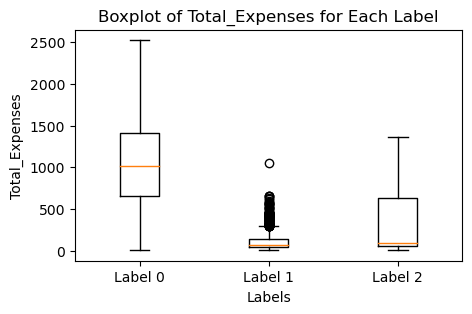

In [46]:
# Box plot of the 'Total_Expenses' vs cluster labels colored by cluster labels
plt.figure(figsize=(5, 3))

# Extract the data for each group
label0_data = df_hier["Total_Expenses"][df_hier.Labels == 0]
label1_data = df_hier["Total_Expenses"][df_hier.Labels == 1]
label2_data = df_hier["Total_Expenses"][df_hier.Labels == 2]

# Create a boxplot with three groups
plt.boxplot([label0_data, label1_data, label2_data], labels=('Label 0', 'Label 1', 'Label 2'))
plt.xlabel('Labels')
plt.ylabel('Total_Expenses')
plt.title('Boxplot of Total_Expenses for Each Label')
plt.show()

- The Total_Expenses is much higher for cluster 0 compared to the clusters 1,2 
- Customers in cluster 0 are more likely to buy new products they spend more money follwed by cluster 1 and 2

<Figure size 500x300 with 0 Axes>

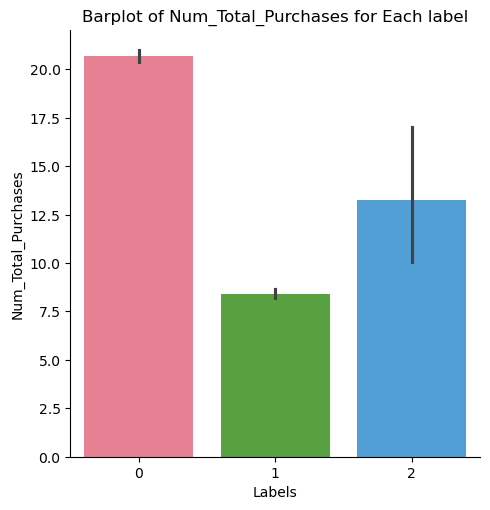

In [47]:
# cat plot of the 'NumTotalPurchases' vs cluster labels colored by cluster labels
plt.figure(figsize=(5, 3))

# Define a color palette with different colors
colors = sns.color_palette('husl', n_colors=len(df_hier['Labels'].unique()))

sns.catplot(x='Labels', y='Num_Total_Purchases', data=df_hier, kind='bar', palette=colors)
plt.title('Barplot of Num_Total_Purchases for Each label')
plt.show()

- Customers in cluster 0 make a lot more purchases compared to those in clusters  1 and 2.

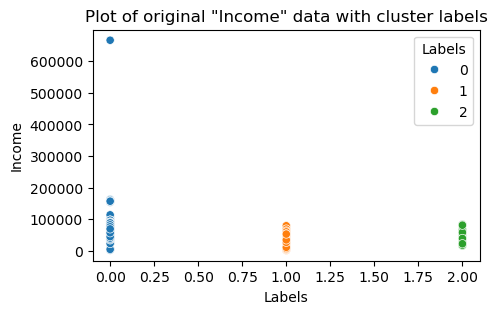

In [48]:
# scatter plot of the 'Income' vs cluster labels colored by cluster labels
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Labels', y='Income', hue='Labels', data=df_hier, palette='tab10')
plt.title('Plot of original "Income" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('Income')
plt.show()

- More Customers fall in cluster 0 has more income.
- Company can promote products to customers in cluster 0.
- While in cluster 1 and 2 the income is less for them chances are less for those customers.

<Figure size 500x300 with 0 Axes>

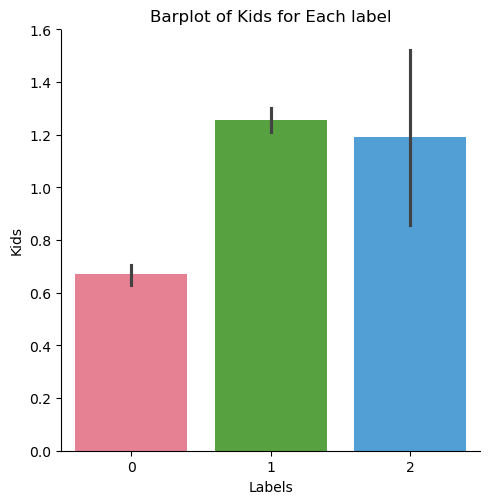

In [49]:
# cat plot of the 'Income' vs cluster labels colored by cluster labels
plt.figure(figsize=(5, 3))

# Define a color palette with different colors
colors = sns.color_palette('husl', n_colors=len(df_hier['Labels'].unique()))

sns.catplot(x='Labels', y='Kids', data=df_hier, kind='bar', palette=colors)
plt.title('Barplot of Kids for Each label')
plt.show()

- no. of kids is more in cluster 3

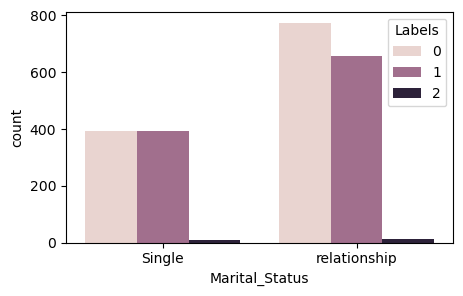

In [50]:
# count plot of the 'Marital_Status' vs cluster labels colored by cluster labels
plt.figure(figsize=(5, 3))
sns.countplot(x='Marital_Status', hue='Labels', data=df_hier)
plt.show()

- We can observe that the most of the customers who are in a relationship falls under cluster 0.
- It means that customers who is in relationship are more likely to buy the products.

<Figure size 500x300 with 0 Axes>

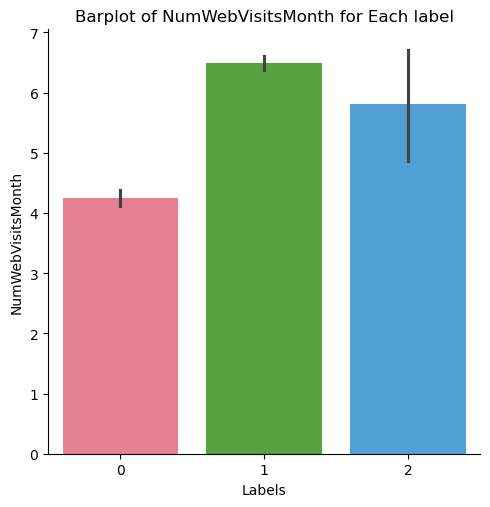

In [51]:
# cat plot(bar) of the 'NumWebVisitsMonth' vs cluster labels colored by cluster labels
plt.figure(figsize=(5, 3))

# Define a color palette with different colors
colors = sns.color_palette('husl', n_colors=len(df_hier['Labels'].unique()))
sns.catplot(x='Labels', y='NumWebVisitsMonth', data=df_hier, kind='bar', palette=colors)
plt.title('Barplot of NumWebVisitsMonth for Each label')
plt.show()

- Majority of the customers visiting the comapany's website are from cluster 1
- The second most website hits are received from Cluster 0 customers and the least from cluster 2 customers

## Conclustion

### Based on the analysis of the marketing dataset using K-means and agglomerative clustering, as well as dimensionality reduction using PCA, several conclusions can be drawn:

<div style="font-family: Arial; font-weight: bold; font-size: 1.1em; color: #00b3e5; text-align: center;">
    Clusters Interpretations
</div>  

- The dataset can be effectively segmented into three distinct clusters based on the agglomerative clustering analysis. Each cluster represents a different segment of customers with unique characteristics and behaviors.
- 1. Cluster 0:
      - This cluster comprises customers who make the maximum purchases.
      - They also spend the highest amount and have the highest income among the clusters.
- 2. Cluster 1:
      - Customers in this cluster exhibit the lowest total expenses.
      - They maintain the minimum balance and make the fewest purchases compared to the other clusters.
- 3. Cluster 2:
      - Customers belonging to this cluster engage in average purchase behavior.
      - Their income levels are also average.

<div style="font-family: Arial; font-weight: bold; font-size: 1.1em; color: #00b3e5; text-align: center;">
    Unlocking Growth Opportunities: Insights from Customer Segmentation Analysis
</div> 


- Key Features:

    - Noteworthy features such as income level, total expenses, and purchase frequency are likely pivotal in determining customers' cluster affiliations.
    
- Tailored Strategies:

    - Crafting tailored marketing strategies for each segment can optimize engagement and drive sales.
    - Targeting high-value customers (Cluster 0) with premium offers and personalized recommendations can amplify satisfaction and loyalty.
    - Offering promotions and discounts to moderate-value customers (Cluster 1) may encourage repeat purchases.
    - Implementing incentives for low-value customers (Cluster 2) could stimulate spending and elevate their value potential.
    
- Product Enhancement:

    - Delving into the preferences and spending patterns of distinct customer segments can inform strategic product development.
    - Adapting products and services to align with the specific needs of each segment can foster heightened satisfaction and allegiance.
    
- Operational Efficiency:

     - Operational efficiencies, encompassing areas such as inventory management and customer service, can be honed by tailoring approaches to suit the characteristics of different customer segments.
     - Strategically allocating resources, particularly towards catering to the needs of high-value customers, can bolster overall operational efficacy.
     
In essence, leveraging insights garnered from customer segmentation analysis empowers organizations to devise targeted marketing initiatives, fortify customer relationships, and propel sustainable business expansion.

<div style="font-family: Arial; font-weight: bold; font-size: 1.1em; color: #00b3e5; text-align: center;">
    Overall Conclusions from Marketing Dataset Clustering and Dimensionality Reduction
</div>

- In this case study, we have attempted to cluster marketing dataset using K-means and agglomerative clustering and we also reduced the dimensionality of the dataset using PCA.
- We came up with 3 clusters using K-means and 3 classes using agglomerative clustering.
- Although selection of the clusters can be revised using Silhoutte score but for a general introductory part it is okay to visualize the plot (either elbow graph or dendrograms) and come up with a particular clusters size.
- Further, we can also do the cluster analysis by doing bivariate analysis between cluster labels and different features and understand the characteristics of different groups.

-----
## Happy Learning
-----